<a href="https://colab.research.google.com/github/aseddin/F22_ECE4715/blob/main/3_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifiers (NBC)

Naive Bayes Classifiers are generative probabilistic models of the form: 

$$
p(y = c \mid \pmb{x}; \boldsymbol{\theta}) = \frac
{p(\pmb{x} \mid y = c; \boldsymbol{\theta}) p(y = c; \boldsymbol{\theta})}
{\sum_{c'} p(\pmb{x} \mid y = c'; \boldsymbol{\theta}) p(y = c'; \boldsymbol{\theta})}
$$

They are based on the **_naive_** assumption the features are conditionally independent given a class label. Despite this naive assumption, NBCs have performed well in many real-world situations. Moreover, they are quite simple to compute $\mathcal{O}(CD)$, where $C$ is the number of classes and $D$ is the number of features. This computational complexity indicates NBCs are well suited for higher dimensional features i.e. they alleviate problems associated with the "curse of dimensionality"

From probability theory we note that if random variables $A$ and $B$ are indpendent:
$$
p(A, B) = p(A) p(B)
$$

Where $p$ represent the joint/marginal PDF or PMF of a random variable.

Therefore, we can rewrite the class conditional density considering the naive assumption of feature indpendence as:
$$
p(\pmb{x} \mid y=c, \boldsymbol{\theta}) = \prod\limits_{d = 1}^{D} p(x_d \mid y=c, \boldsymbol{\theta_{dc}})
$$

Where:
* $\pmb{x} = [x_1, x_2, \dots, x_D]^T$ is the feature vector
* $x_d$ one of the features in the feature vector $\pmb{x}$
* $\boldsymbol{\theta_{dc}}$ are the parameters for the class conditional density for class $c$ and feature $d$

The posterior probability can be rewritten as:
$$
p(y = c \mid \pmb{x}; \boldsymbol{\theta}) = \frac
{\pi_c \prod\limits_{d = 1}^{D} p(x_d \mid y=c, \boldsymbol{\theta_{dc}}) }
{\sum_{c'} \pi_{c'} \prod\limits_{d = 1}^{D} p(x_d \mid y=c', \boldsymbol{\theta_{dc'}})}
$$

We have options when specifying $p(x_d \mid y=c, \boldsymbol{\theta_{dc}})$ and they depend on the type of feature $x_d$ (i.e. real number, binary, categorical, ...etc). The main difference between Naive Bayes Classifiers stem from the options selected for $p(x_d \mid y=c, \boldsymbol{\theta_{dc}})$

Naive Beyes Classifiers parameters are simple to estimate

In [226]:
# code to set things up

# importing commong libraries
import numpy as np
import pandas as pd

# Things related to figures and plots
# make figures look nicer
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# figure saving function
from pathlib import Path
IMAGES_PATH = Path() / "images" / "LDA"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

# useful plotting functions

# plot 2d data points
def plot_dataset(X, y):
  # figure out the number of classes in the dataset
  n_classes = len(np.unique(y)) 
  markers = 'xod.svp*+D'
  for c in range(n_classes):
    plt.scatter(X[:, 0][y==c], X[:, 1][y==c], marker=markers[c])
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)
  plt.axis("scaled")

# plot 2d decision boundaries and regions
def plot_prediction(clf, axes):
  x1r = np.linspace(axes[0], axes[1], 200)
  x2r = np.linspace(axes[2], axes[3], 200)
  x1, x2 = np.meshgrid(x1r, x2r)
  X = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X).reshape(x1.shape)
  plt.contourf(x1, x2, y_pred, alpha=0.2)



## Gaussian Naive Bayes (real-valued features)

If $x_d \in \mathbb{R}$ (real-valued features) we can use the univariate Gaussian distributions for the class conditional densities:

$$
p(\pmb{x} \mid y=c, \boldsymbol{\theta}) = \prod\limits_{d=1}^{D} \mathcal{N}(x_d \mid \mu_{dc}, \sigma^2_{dc})
$$

Where:
* $\mu_{dc}$ is the mean of feature $d$ when class lable is $c$
* $\sigma_{dc}^2$ is the variance of feature $d$ when class lable is $c$

This is equivalent to Quadratic Discriminant Analysis (QDA) using untied (unshared) diagonal covariance matrices

**Model fitting**

Using MLE we find:

* $\hat\pi_c = \frac{N_c}{N}$
* $\mu_{dc} = \frac{1}{N_c} \sum\limits_{n:y_n=c} x_{nd}$
* $\hat\sigma_{dc}^2 = \frac{1}{N_c} \sum\limits_{n:y_n=c} (x_{nd} - \hat\mu_{dc})^2$

These are simple and efficient

### Generate data using `make_blobs`

[`make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) generates isotropic Gaussian blobs. The function is similar to the `make_gaussian_data` used in the Linear Discriminant Analysis notebook; however, it only allows isotropic Gaussian (diagonal covariance matrices with the same variances in the main diagonal)

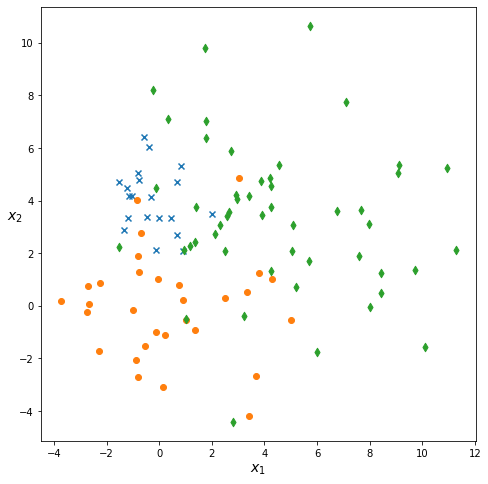

In [227]:
from sklearn.datasets import make_blobs

n_samples = [20, 30, 50]

mus = [
    [0, 4],
    [0, 0],
    [4, 4]
]

stds = [1, 2, 3]

X, y = make_blobs(
    n_samples=n_samples, n_features=2,
    centers=mus, cluster_std=stds
    )

plt.figure(figsize=(8, 8))
plot_dataset(X, y)

In [228]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X, y)

print("Class priors: ", gnb_clf.class_prior_)
print("Centers:", gnb_clf.theta_)
print("Variance of each feature per class:\n", gnb_clf.var_)

Class priors:  [0.2 0.3 0.5]
Centers: [[-0.26474527  4.03340421]
 [ 0.35558929 -0.02258258]
 [ 4.48485002  3.34789478]]
Variance of each feature per class:
 [[0.83428709 1.33291979]
 [5.37863751 3.77606134]
 [9.86996961 7.94620461]]


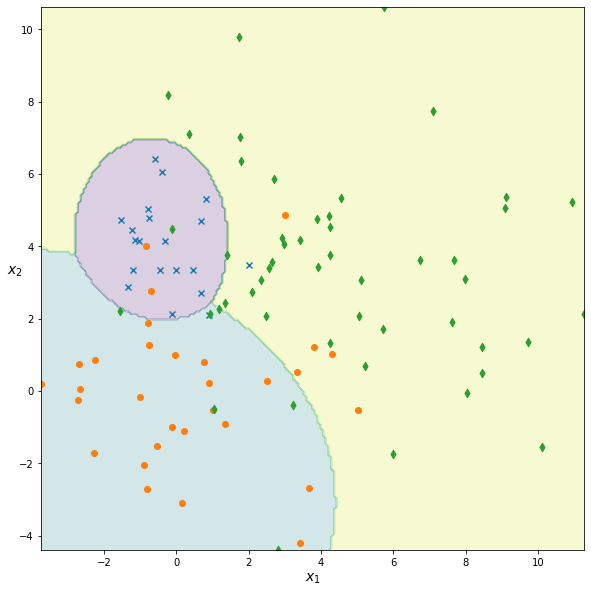

In [229]:
plt.figure(figsize=(10, 10))
plot_prediction(gnb_clf, [X.min(0)[0], X.max(0)[0], X.min(0)[1], X.max(0)[1]])
plot_dataset(X, y)

## Bernoulli Naive Bayes (binary features)

If $x_d \in \{0, 1\}$ (binary features) we can use the univariate Bernoulli distribution for the class conditional densities:

$$
p(\pmb{x} \mid y=c, \boldsymbol{\theta}) = \prod\limits_{d=1}^{D} \text{Ber}(x_d \mid \theta_{dc})
$$

Where:
* $\text{Ber}(x_d \mid \theta_{dc}) = 
  \begin{cases}
  \theta_{dc} & x_d = 1 \\
  1 - \theta_{dc} & x_d = 0 \\
  \end{cases}
  $
* $\theta_{dc}$ is the probability that $x_d = 1$ in class $c$

**Model fitting**

Using MLE we find:
* $\hat\pi_c = \frac{N_c}{N}$
* $\hat{\theta}_{dc} = \frac{N_{dc}}{N_c}$ the fraction of times feature $d$ is on in examples of class $c$

In [230]:
from sklearn.naive_bayes import BernoulliNB

n_features = 15
n_samples = 60000
n_classes = 3

# Generate binary features
X = np.random.randint(2, size=(n_samples, n_features))
y = np.random.randint(n_classes, size=(n_samples, ))

bnb_clf = BernoulliNB()
bnb_clf.fit(X, y)

# print a sample of the dataset
X_dataframe = pd.DataFrame(np.c_[X, y], columns=[f"x{i}" for i in range(X.shape[1])]+["label"])

X_dataframe.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,label
0,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,2
1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,2
2,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0
3,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
4,0,1,1,1,1,0,0,0,1,1,1,0,0,1,1,1


In [231]:
print("Mean accuracy for training:", bnb_clf.score(X, y))

Mean accuracy for training: 0.3433333333333333


## Categorical Naive Bayes (categorical features)

If $x_d \in \{1, \dots, K\}$ (categorical features) we can use the univariate categorical distribution:

$$
p(\pmb{x} \mid y=c, \boldsymbol{\theta}) = \prod\limits_{d=1}^{D} \text{Cat}(x_d \mid \theta_{dc})
$$

Where:

Given a class $c$

* $\text{Cat}(x_d \mid \theta_{dc}) = 
  \begin{cases}
  \theta_{dc1}     & x_d = 1 \\
  \theta_{dc2}     & x_d = 2 \\
  \vdots          & \vdots \\
  \theta_{dcK}     & x_d = K\\
  \end{cases}
  $


* $0 \leq \theta_{dck} \leq 1$ and $\sum_{k=1}^{k=K} \theta_{dck} = 1$

**Model fitting**

Using MLE we find:
* $\hat\pi_c = \frac{N_c}{N}$
* $\hat{\theta}_{dck} = \frac{N_{dck}}{\sum_{k'=1}^{K} N_{dck'}} = \frac{N_{dck}}{N_c}$
* Where $N_{dck} = \sum_{n=1}^{N} \mathbb{I}(x_{nd}=k, y_n=c)$ is the number of times that feature $d$ had value $k$ in examples of class $c$

In [232]:
from sklearn.naive_bayes import CategoricalNB

n_features = 15
n_samples = 60000
n_classes = 3
n_categories = 7

# Generate categorical features
X = np.random.randint(n_categories, size=(n_samples, n_features))
y = np.random.randint(n_classes, size=(n_samples, ))

cnb_clf = CategoricalNB()
cnb_clf.fit(X, y)

# print a sample of the dataset
X_dataframe = pd.DataFrame(np.c_[X, y], columns=[f"x{i}" for i in range(X.shape[1])]+["label"])

X_dataframe.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,label
0,4,6,1,1,0,2,2,6,5,2,4,3,5,1,1,2
1,2,0,2,2,1,3,4,4,2,5,6,3,1,2,0,2
2,1,5,2,3,1,2,4,4,5,5,5,1,1,1,5,0
3,2,6,2,1,5,5,6,4,5,5,3,1,0,5,6,0
4,3,1,0,5,3,4,4,6,3,5,1,5,5,5,4,2


In [233]:
print("Mean accuracy for training:", cnb_clf.score(X, y))

Mean accuracy for training: 0.3523
